# 01 - Data Cleaning
---
This notebook performs the cleaning phase of the pipeline. It loads the raw dataset from `data/raw/`, identifies and handles missing data, removes duplicates, applies useful transformations, and saves the result to the `data/interim/` folder.


## Import libraries and set the paths

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.config import RAW_DATA_DIR, INTERIM_DATA_DIR, FIGURES_DIR

2025-06-11 23:23:51.272 | INFO     | src.config:<module>:11 - PROJ_ROOT path is: /home/leonardosaccotelli/Desktop/UNIVERSITA/MACHINE-LEARNING/Dynamic-Ensemble-Learning-for-Credit-Card-Fraud-Detection


In [2]:
input_path: Path = RAW_DATA_DIR / "creditcardfraud.csv"
interim_path: Path = INTERIM_DATA_DIR / "creditcardfraud_cleaned.csv"
print(f"input_path:   {input_path}\n"
      f"interim_path: {interim_path}")

input_path:   /home/leonardosaccotelli/Desktop/UNIVERSITA/MACHINE-LEARNING/Dynamic-Ensemble-Learning-for-Credit-Card-Fraud-Detection/data/raw/creditcardfraud.csv
interim_path: /home/leonardosaccotelli/Desktop/UNIVERSITA/MACHINE-LEARNING/Dynamic-Ensemble-Learning-for-Credit-Card-Fraud-Detection/data/interim/creditcardfraud_cleaned.csv


In [3]:
FIGURES_DATA_CLEANING_DIR = FIGURES_DIR / "data_cleaning"
FIGURES_DATA_CLEANING_DIR.mkdir(parents=True, exist_ok=True)

In [4]:
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = '14'

## Data Loading
We begin by loading the raw credit card fraud dataset. This is the untouched file downloaded from Kaggle. It contains anonymized PCA components (`V1`–`V28`), `Time`, `Amount`, and the `Class` label.


In [5]:
df = pd.read_csv(input_path, delimiter=",")
print(f"rows, cols = {df.shape}")

rows, cols = (284807, 31)


In [6]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,-1.109232,-0.453235,-1.046946,1.122674,1.243518,-1.431897,0.939328,-0.002373,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Missing Values Analysis

### Visual Inspection

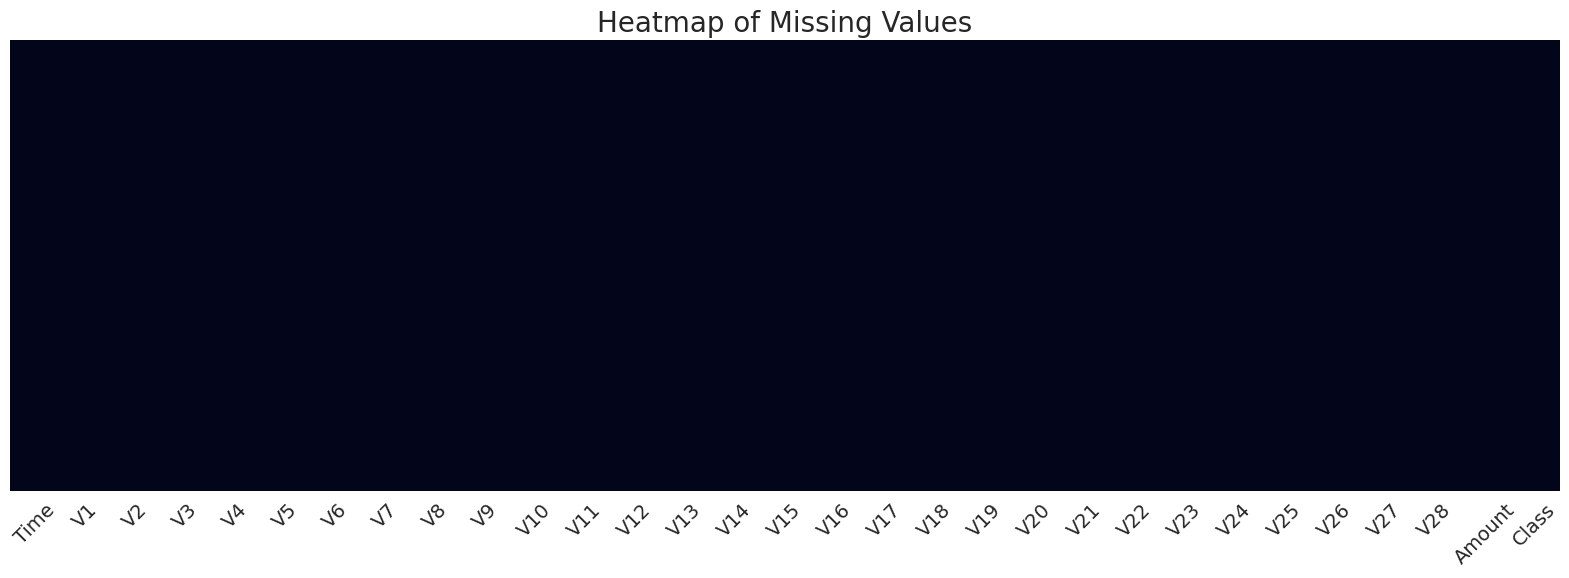

In [10]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values", fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(FIGURES_DATA_CLEANING_DIR / "missing_values.png", dpi=300)
plt.show()

### Column-Level Analysis
Missing data may indicate corruption, incomplete exports, or systematic recording errors.

- **Justification:** Columns with missing data may reduce model performance and require imputation or exclusion.

- **Utility:** This step informs whether any imputation strategies might be necessary later.

In [11]:
null_cols = df.isnull().sum()
null_cols = null_cols[null_cols > 0].sort_values(ascending=False)

if null_cols.empty:
    print("No missing values detected in any column.")
else:
    print("Missing values per column:")
    for col, n_missing in null_cols.items():
        print(f" - {col}: {n_missing} ({n_missing / df.shape[0] * 100:.3f}%)")

No missing values detected in any column.


### Row-Level Analysis
Rows with mostly missing data are likely not salvageable.

- **Justification:** Imputing >50% of a row's content introduces too much uncertainty.

- **Utility:** Prevents noisy, unreliable rows from corrupting the model training phase.

In [12]:
n_before = df.shape[0]
row_null_percent = df.isnull().mean(axis=1) * 100
rows_to_drop = df[row_null_percent > 50].index
df.drop(index=rows_to_drop, inplace=True)
n_dropped = n_before - df.shape[0]

print(f"Number of rows with >50% NaNs removed: {n_dropped}/{n_before} "
      f"({n_dropped / n_before * 100:.3f}%)")

Number of rows with >50% NaNs removed: 0/284807 (0.000%)


## Class Balance
We inspect the target distribution to confirm the expected class imbalance.

- **Justification:** In fraud detection, we expect a very small percentage of transactions to be fraudulent.

- **Utility:** Confirms no accidental removal of minority class (Class = 1).

In [13]:
print("Class distribution:")
class_counts = df['Class'].value_counts()
total = class_counts.sum()
for label, count in class_counts.items():
    print(f" - Class {label}: {count} ({count / total * 100:.3f}%)")

Class distribution:
 - Class 0: 284315 (99.827%)
 - Class 1: 492 (0.173%)


## Duplicate Row Detection and Removal

Duplicate transactions may occur due to export processes or data corruption. They can bias models and falsely inflate evaluation metrics.

- **Justification:** In fraud detection, duplicates may lead to data leakage and overfitting.

- **Utility:** Ensures that each transaction is a unique signal.

In [14]:
# Total number of rows
n_total = df.shape[0]

# Identify full duplicates (excluding the first occurrence,
# we are assessing redundancy, not the total repeated rows)
n_duplicates = df.duplicated().sum()

print(f"Number of duplicate rows: {n_duplicates}/{n_total} ({n_duplicates / n_total * 100:.3f}%)")

Number of duplicate rows: 1081/284807 (0.380%)


In [15]:
# Identify all duplicated rows (including the first occurrence)
duplicate_rows_all = df[df.duplicated(keep=False)]

# Group by all columns and count identical rows
duplicate_groups = (
    duplicate_rows_all
    .groupby(list(df.columns))
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
)

print(f"Found {len(duplicate_groups)} unique duplicated row patterns.")
duplicate_groups.head(10)

Found 773 unique duplicated row patterns.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,count
724,163152.0,-1.196037,1.585949,2.883976,3.378471,1.511706,3.717077,0.585362,-0.156001,0.122648,4.217934,1.385525,-0.709405,-0.256168,-1.564352,1.693218,-0.785210,-0.228008,-0.412833,0.234834,1.375790,-0.370294,0.524395,-0.355170,-0.869790,-0.133198,0.327804,-0.035702,-0.858197,7.56,0,18
723,163152.0,-1.203617,1.574009,2.889277,3.381404,1.538663,3.698747,0.560211,-0.150911,0.124136,4.220998,1.384569,-0.706897,-0.256274,-1.562583,1.692915,-0.787338,-0.226776,-0.412354,0.234322,1.385597,-0.366727,0.522223,-0.357329,-0.870174,-0.134166,0.327019,-0.042648,-0.855262,1.51,0,18
766,170731.0,2.033492,0.766969,-2.107555,3.631952,1.348594,-0.499907,0.945159,-0.286392,-1.370581,1.653073,-1.600434,-1.510901,-2.143280,1.189850,-0.875588,0.175808,-0.419433,-0.464717,-1.414528,-0.430560,0.241894,0.658545,-0.102644,0.580535,0.643637,0.347240,-0.116618,-0.078601,0.76,0,9
146,43153.0,-2.086016,2.203265,1.654339,2.941050,-1.683045,0.529728,-1.352162,1.793449,-0.723686,0.600365,-0.982212,-0.551636,-1.337000,0.834403,1.251862,0.033455,1.067978,0.160510,0.213087,0.079002,0.216444,0.567241,-0.035345,0.370201,0.157378,0.440341,0.210230,0.090558,0.76,0,9
281,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,-5.052502,4.406806,-4.610756,-1.909488,-9.072711,-0.226074,-6.211557,-6.248145,-3.149247,0.051576,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1,6
287,68780.0,0.488552,-0.922367,1.673494,3.003203,-1.465758,0.749788,-0.700551,0.383919,0.511891,0.337366,-0.709190,-0.268924,-1.019959,-0.303537,0.313830,0.541531,-0.068846,-0.113716,-1.644419,0.309299,0.371627,0.606800,-0.222559,0.405858,0.080003,0.148637,0.022034,0.087126,282.98,0,5
252,64947.0,-6.370459,3.306401,1.724991,-1.589581,0.174936,0.232403,2.967884,-3.421005,7.937413,11.515880,3.023644,-0.781401,-1.140026,-5.800852,0.406259,-1.723657,-2.375979,-0.529492,-0.100033,2.943972,-1.614332,0.387513,-0.364322,0.480224,0.154904,-0.535302,-4.787907,-3.696616,12.33,0,5
251,64947.0,-6.373391,3.301783,1.727041,-1.588447,0.185362,0.225313,2.958156,-3.419036,7.937988,11.517065,3.023275,-0.780431,-1.140067,-5.800167,0.406141,-1.724479,-2.375503,-0.529306,-0.100230,2.947765,-1.612952,0.386673,-0.365157,0.480075,0.154530,-0.535606,-4.790593,-3.695480,9.99,0,5
253,64947.0,-6.342969,3.349697,1.705767,-1.600219,0.077178,0.298877,3.059092,-3.439462,7.932015,11.504768,3.027109,-0.790496,-1.139641,-5.807267,0.407360,-1.715942,-2.380449,-0.531228,-0.098178,2.908407,-1.627268,0.395387,-0.356491,0.481618,0.158414,-0.532454,-4.762716,-3.707261,34.27,0,5
250,64947.0,-6.378440,3.293830,1.730572,-1.586493,0.203319,0.213103,2.941403,-3.415646,7.938980,11.519106,3.022639,-0.778760,-1.140137,-5.798989,0.405939,-1.725896,-2.374682,-0.528987,-0.100571,2.954298,-1.610576,0.385227,-0.366595,0.479819,0.153885,-0.536129,-4.795220,-3.693525,5.96,0,5


Check the frequency, that is how many groups have N duplicates.

Number of unique duplicate patterns by repetition count:
 - duplicated 2 times: 611 pattern
 - duplicated 3 times: 66 pattern
 - duplicated 4 times: 81 pattern
 - duplicated 5 times: 10 pattern
 - duplicated 6 times: 1 pattern
 - duplicated 9 times: 2 pattern
 - duplicated 18 times: 2 pattern


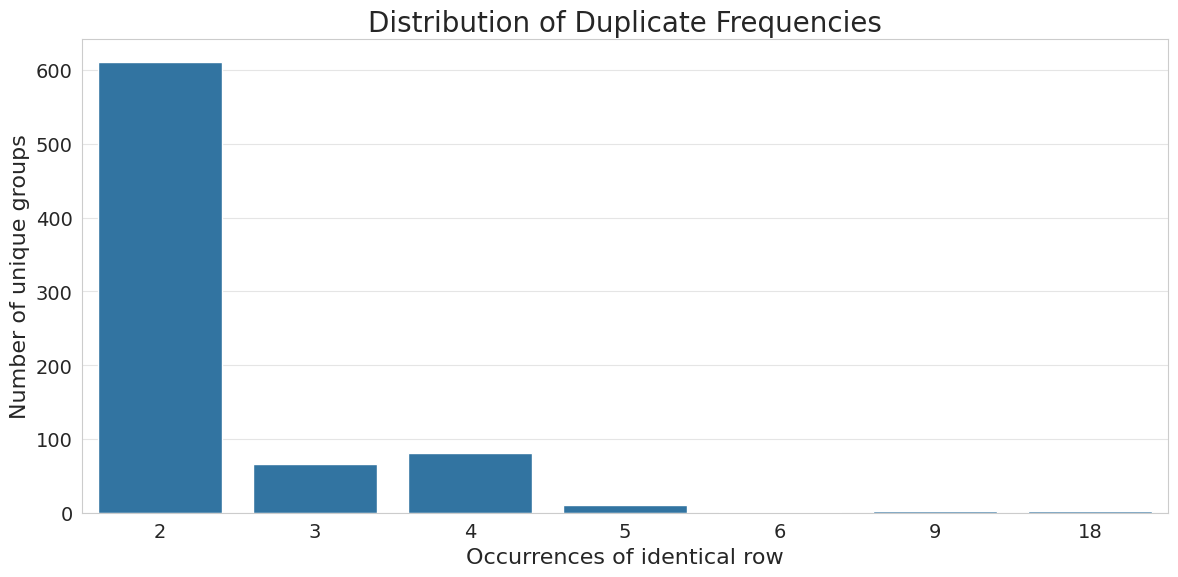

In [16]:
duplication_frequency = duplicate_groups['count'].value_counts().sort_index()
print("Number of unique duplicate patterns by repetition count:")
for repetition, num_groups in duplication_frequency.items():
    print(f" - duplicated {repetition} times: {num_groups} pattern")

plt.figure(figsize=(12, 6))
sns.barplot(x=duplication_frequency.index, y=duplication_frequency.values)
plt.xlabel("Occurrences of identical row", fontsize=16)
plt.ylabel("Number of unique groups", fontsize=16)
plt.title("Distribution of Duplicate Frequencies", fontsize=20)
plt.grid(True, axis='y', alpha=0.5)
plt.tight_layout()
plt.savefig(FIGURES_DATA_CLEANING_DIR / "duplicated_frequency_distribution.png", dpi=300)
plt.show()

Check how the duplicated rows are distributed across the two classes.

In [17]:
# Count how many are Class 0 and Class 1
dup_class_counts = duplicate_rows_all['Class'].value_counts()

print("Class distribution in all duplicated rows:")
for cls, count in dup_class_counts.items():
    pct = count / len(duplicate_rows_all) * 100
    print(f" - Class {cls}: {count} rows ({pct:.4f}%)")

Class distribution in all duplicated rows:
 - Class 0: 1822 rows (98.2740%)
 - Class 1: 32 rows (1.7260%)


Check duplication frequency by Class.

In [18]:
# Group by full feature set and Class label to get counts of each duplicated pattern per class
duplicate_group_class = (
    duplicate_rows_all
    .groupby(list(df.columns))
    .size()
    .reset_index(name="count")
)

# Compute frequency distribution by class
class_frequencies = (
    duplicate_group_class
    .groupby(['Class', 'count'])
    .size()
    .reset_index(name="n_patterns")
    .sort_values(['Class', 'count'])
)

print(f"\nDuplication frequency by class: ")
class_frequencies


Duplication frequency by class: 


,Class,count,n_patterns
0,0,2,600
1,0,3,66
2,0,4,80
3,0,5,10
4,0,9,2
5,0,18,2
6,1,2,11
7,1,4,1
8,1,6,1


In [19]:
n_samples = df.shape[0]
df.drop_duplicates(ignore_index=True, inplace=True)
duplicates = n_samples - df.shape[0]
print(f"Number of canceled duplicates: {duplicates}/{n_samples} ({duplicates / n_samples * 100:.3f}%)")

Number of canceled duplicates: 1081/284807 (0.380%)


In [20]:
print("Class distribution after removing duplication:")
class_counts = df['Class'].value_counts()
total = class_counts.sum()
for label, count in class_counts.items():
    print(f" - Class {label}: {count} ({count / total * 100:.3f}%)")

Class distribution after removing duplication:
 - Class 0: 283253 (99.833%)
 - Class 1: 473 (0.167%)


We are working with the Credit Card Fraud Detection dataset, which contains:

- Time (in seconds)

- Amount

- 28 PCA-transformed features

- Class

When two rows match exactly in all fields, including Time, it's a very strong signal that they’re not two independent real transactions, but instead a copied entry.

Given the time (precise to the second), the amount (float) and 28 PCs, the probability that two truly distinct events would produce identical values in all 31+ columns is astronomically low, even if the same user repeated the action.

This makes true accidental “real” duplication almost impossible.

---

If we leave exact duplicates in the dataset:

1. Bias in the model—The classifier will “see” repeated evidence of the same row. This gives unfair influence to those examples during training.

2. Risk of overfitting—Especially with a small number of fraud cases, repeating exact Class 1 samples inflates the model's confidence.

3. invalidation of cross-validation—Duplicates might leak into both training and validation folds. This leads to optimistically biased performance metrics (especially precision/recall).

Based on these considerations, we adopt the choice of dropping duplicated rows, keeping each of them just one time.

## Save to `data/interim/`

In [21]:
INTERIM_DATA_DIR.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(interim_path, index=False, sep=',')
print(f"Cleaned dataset saved to: {interim_path}")

Cleaned dataset saved to: /home/leonardosaccotelli/Desktop/UNIVERSITA/MACHINE-LEARNING/Dynamic-Ensemble-Learning-for-Credit-Card-Fraud-Detection/data/interim/creditcardfraud_cleaned.csv
